# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import phate
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
X,y = DS.LoadData('Jurkat')

In [4]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X.shape

(3364, 2423)

In [5]:
y = y.reshape((y.shape[0],))

In [6]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'violet',
    'cyan',]# 'lime', 'royalblue' , 'skyblue', 'olive',
    #'tomato', 'saddlebrown', 'sienna', 'navy', 'darkgreen',
    #'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying Phate

In [7]:
X_phate = phate.PHATE().fit_transform(X)

Calculating PHATE...
  Running PHATE on 3364 observations and 2423 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.22 seconds.
    Calculating affinities...
    Calculated affinities in 0.38 seconds.
  Calculated graph and diffusion operator in 2.20 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.46 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.56 seconds.
  Calculated landmark operator in 5.80 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 3.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.36 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.83 seconds.
Calculated PHATE in 15.35 seconds.


# Plotting the results

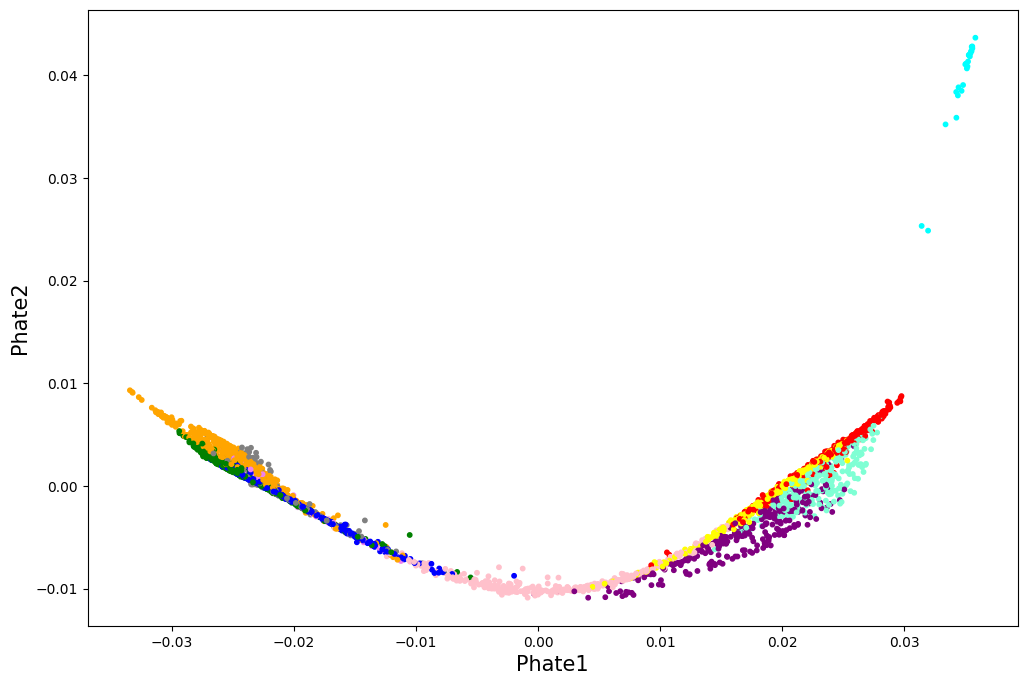

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_phate[:,0],X_phate[:,1],c=cs,s=10)
plt.xlabel("Phate1", fontsize = 15)
plt.ylabel("Phate2", fontsize = 15)
plt.savefig(dir+'Jurkat_Phate.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score_phate = []
res_kmeans_phate = []
res_agglomerative_phate = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    #print("----Phate")
    X_phate = phate.PHATE().fit_transform(X)
    dist_method = np.square(euclidean_distances(X_phate, X_phate)).flatten()
    score_phate.append(DA.correlation(dist_orig, dist_method))
    res_kmeans_phate.append(DA.kmeans(X_phate, y))
    res_agglomerative_phate.append(DA.Agglomerative(X_phate, y))

Iteration 1
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 0.65 seconds.
Calculating KNN search...
Calculated KNN search in 1.22 seconds.
Calculating affinities...
Calculated affinities in 0.36 seconds.
  Calculated graph and diffusion operator in 2.25 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.50 seconds.
  Calculating KMeans...
  Calculated KMeans in 4.58 seconds.
Calculated landmark operator in 5.87 seconds.
  Calculating optimal t...
  Calculated optimal t in 3.32 seconds.
  Automatically selected t = 9
  Calculating diffusion potential...
  Calculated diffusion potential in 0.39 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 35.76 seconds.
Calculated PHATE in 47.59 seconds.
Iteration 2
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 0.59 seconds.
Calculating KNN search...
Calculated KNN search in 1.22 seconds.
C

In [10]:
result = pd.DataFrame(score_phate,columns =['Phate'])
result

,Phate
0,0.227600
1,0.232233
2,0.230128
3,0.226591
4,0.235434
5,0.226418
6,0.229864
7,0.229882
8,0.235037
9,0.233196


In [11]:
pd.DataFrame(res_kmeans_phate,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.274373,0.360728,0.488544,0.487099,0.558696
1,0.266996,0.353343,0.482697,0.473493,0.567463
2,0.286340,0.372379,0.488553,0.490807,0.539220
3,0.282782,0.368748,0.489552,0.450571,0.618242
4,0.303572,0.394585,0.494675,0.535095,0.498198
5,0.285114,0.371061,0.487813,0.474812,0.568188
6,0.280433,0.365642,0.485461,0.490687,0.543424
7,0.278710,0.364481,0.486859,0.493549,0.548056
8,0.292079,0.377742,0.491220,0.504983,0.521867
9,0.272374,0.359018,0.489401,0.497912,0.536713


In [12]:
pd.DataFrame(res_agglomerative_phate,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.275944,0.359731,0.483447,0.447955,0.581887
1,0.282328,0.367986,0.486112,0.444777,0.578323
2,0.280557,0.367460,0.490219,0.468482,0.555246
3,0.264441,0.356703,0.477730,0.422567,0.613506
4,0.311500,0.406122,0.500370,0.530180,0.500174
5,0.275327,0.362952,0.482935,0.450467,0.594922
6,0.273890,0.360422,0.487644,0.462251,0.548378
7,0.270922,0.360537,0.486578,0.477848,0.539425
8,0.278342,0.365873,0.486037,0.483438,0.531725
9,0.279991,0.371066,0.490930,0.472938,0.535165
